Lo primero que hacemos es importar las principales librerias que vamos a usar, así como el acceso a drive, para poder cargar nuestros datos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,8)

pd.options.mode.chained_assignment = None

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/datosTFM/Madrid/tributos_cedidos_gestion_propia.csv',sep=';', decimal=',',encoding='latin-1')
df

,año,trimestre,tributos_cedidos_de_gestion_propia,derechos_reconocidos_netos_euros,recaudado_neto_euros
0,2020,1,impuesto_sucesiones_y_donaciones,8.689011e+07,6.775601e+07
1,2020,2,impuesto_sucesiones_y_donaciones,5.403264e+07,4.947774e+07
2,2020,3,impuesto_sucesiones_y_donaciones,1.192023e+08,1.047789e+08
3,2020,4,impuesto_sucesiones_y_donaciones,2.364481e+08,1.911965e+08
4,2020,1,impuesto_transmisiones_patrimoniales_onerosas,1.817582e+08,1.741310e+08
...,...,...,...,...,...
91,2015,4,impuesto_actos_jurídicos_documentados,6.134126e+07,6.042775e+07
92,2015,1,tasa_fiscal_del_juego,3.455452e+07,2.946555e+07
93,2015,2,tasa_fiscal_del_juego,4.101722e+07,3.221175e+07
94,2015,3,tasa_fiscal_del_juego,3.344166e+07,3.187614e+07


Una vez cargados nuestros datos, vamos a ver el tamaño de nuestro dataframe.

In [4]:
print(df.shape)
print(df.dtypes)

(96, 5)
año                                     int64
trimestre                               int64
tributos_cedidos_de_gestion_propia     object
derechos_reconocidos_netos_euros      float64
recaudado_neto_euros                  float64
dtype: object


Y veamos cuales son numéricas y cuales no.

In [5]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['año' 'trimestre' 'derechos_reconocidos_netos_euros'
 'recaudado_neto_euros']


In [6]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['tributos_cedidos_de_gestion_propia']


Veamos el porcentaje de datos faltantes de las columnas.

In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

año - 0%
trimestre - 0%
tributos_cedidos_de_gestion_propia - 0%
derechos_reconocidos_netos_euros - 0%
recaudado_neto_euros - 0%


# Proceso KDD

# ETAPA 1: Selección de datos

In [8]:
# Creamos un nuevo archivo solo con las variables numéricas

import numpy as np
df_numeric = df.select_dtypes(include=[np.number])
# Lo guardamos en un nuevo archivo
df_numeric.to_csv('/content/drive/MyDrive/datosTFM/Madrid/tributos_cedidos_gestion_propia_numeric.csv', index=False)

In [9]:
df_numeric

,año,trimestre,derechos_reconocidos_netos_euros,recaudado_neto_euros
0,2020,1,8.689011e+07,6.775601e+07
1,2020,2,5.403264e+07,4.947774e+07
2,2020,3,1.192023e+08,1.047789e+08
3,2020,4,2.364481e+08,1.911965e+08
4,2020,1,1.817582e+08,1.741310e+08
...,...,...,...,...
91,2015,4,6.134126e+07,6.042775e+07
92,2015,1,3.455452e+07,2.946555e+07
93,2015,2,4.101722e+07,3.221175e+07
94,2015,3,3.344166e+07,3.187614e+07


# Etapa 4: Minería de Datos

Los datos no necesitan ni limpieza ni transformación, por lo que pasamos directamente a la etapa de minería.
En primer lugar se va a ver la correlación entre las diferentes variables.

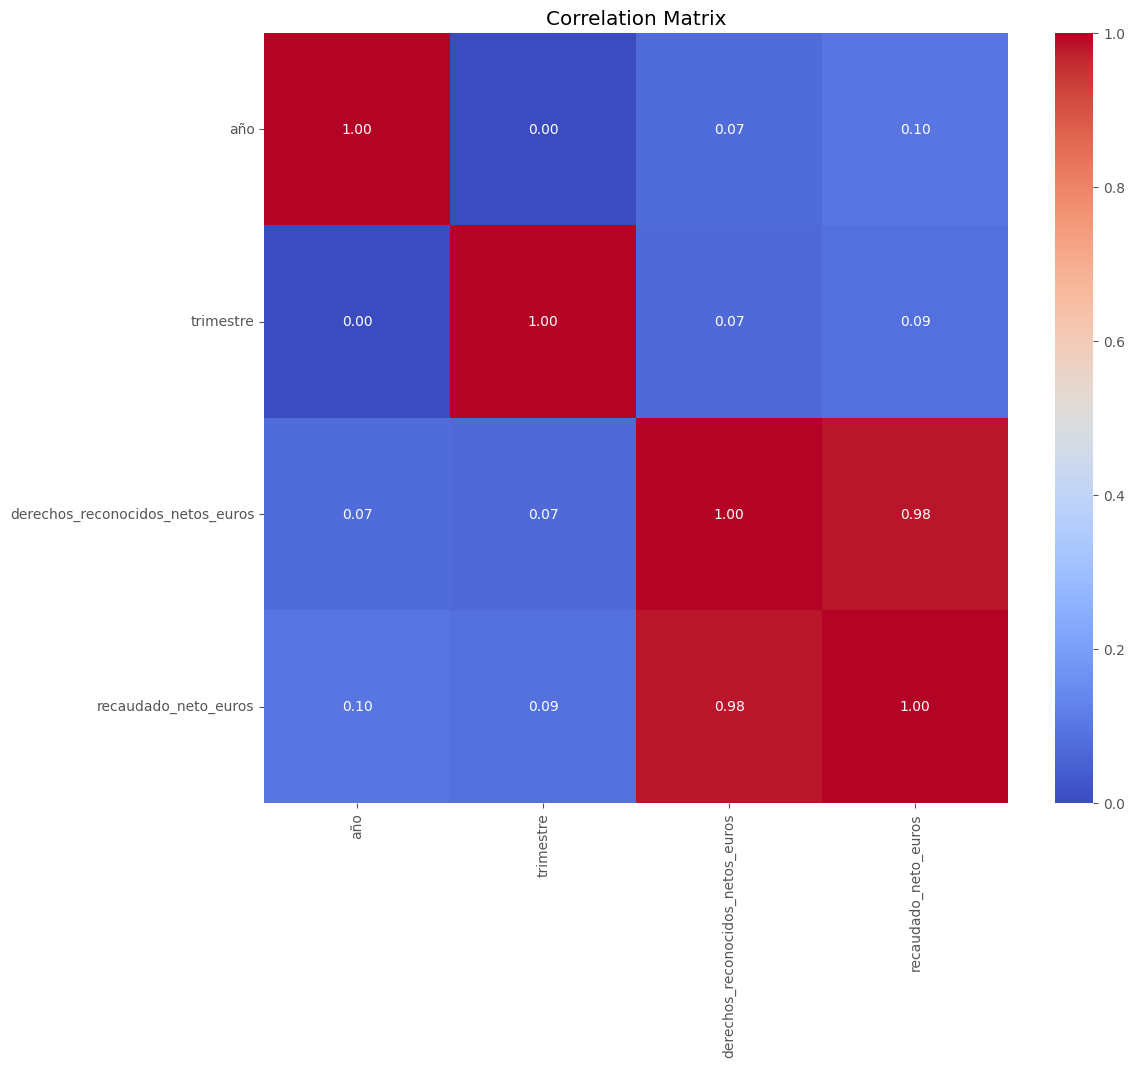

In [10]:
#Matriz de correlacion

import matplotlib.pyplot as plt
# Calculamos la matriz de correlación
correlation_matrix = df_numeric.corr()

# Representamos la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

Quremos predecir la variable recaudado neto en euros, en función del resto, y veamos cuál es el mejor modelo para ello.

In [11]:
# Veamos cuál es el mejor modelo machine learning para mi conjunto de datos

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionamos la variable objetivo y las variables características.

features = ['año', 'trimestre', 'derechos_reconocidos_netos_euros']
target = 'recaudado_neto_euros'
# Creamos la matriz características (X) y el vector objetivo (y)
X = df[features]
y = df[target]

# Dividimos los datos en conjuntos de entrenamiento y de prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializamos los modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

# Entrenamos y evaluamos los modelos
results = {}
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  results[name] = {'mse': mse, 'r2': r2}

# Mostrtamos los resultados
for name, metrics in results.items():
  print(f'{name}:')
  print(f'  Mean Squared Error (MSE): {metrics["mse"]:.2f}')
  print(f'  R-squared (R2): {metrics["r2"]:.2f}')
  print()

# Determinamos el mejor modelo basado en R2
best_model = max(results, key=lambda k: results[k]['r2'])
print(f'mejor modelo basado en R2: {best_model}')

Linear Regression:
  Mean Squared Error (MSE): 71334151437758.61
  R-squared (R2): 0.99

Decision Tree Regression:
  Mean Squared Error (MSE): 208264646635441.31
  R-squared (R2): 0.96

Random Forest Regression:
  Mean Squared Error (MSE): 284759153280071.56
  R-squared (R2): 0.94

Support Vector Regression:
  Mean Squared Error (MSE): 5367497583449326.00
  R-squared (R2): -0.04

Best model based on R-squared: Linear Regression


In [12]:
# Modelo de regresión
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Selecionamos la variable objetivo y las variables características
features = ['año', 'trimestre', 'derechos_reconocidos_netos_euros']
target = 'recaudado_neto_euros'
# Creamos la matriz característica (X) y el vector objetivo (y)
X = df[features]
y = df[target]
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de regresión lineal
model = LinearRegression()

# Entenamos el modelo
model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = model.predict(X_test)

# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 71334151437758.61


# ETAPA 5: Evaluación

Comienzo con la etapa de evaluación y visualización de resultados, comparando los valores reales, con las predicciones.

In [13]:
# Muestro las predicciones junto con los valores reales
import pandas as pd
resultados = pd.DataFrame({'Valor_Real': y_test, 'Predicciones': y_pred})
print(resultados)

      Valor_Real  Predicciones
80  6.442122e+07  8.157662e+07
77  3.422836e+07  3.032070e+07
73  6.424388e+07  5.850930e+07
94  3.187614e+07  2.595132e+07
33  9.654251e+07  1.079125e+08
79  3.710678e+07  3.448904e+07
69  2.074413e+08  2.024678e+08
42  9.701576e+07  8.991977e+07
0   6.775601e+07  7.974444e+07
10  7.838837e+07  7.440599e+07
64  7.350188e+07  8.623674e+07
30  3.081838e+07  3.165258e+07
18  9.741319e+07  9.611651e+07
4   1.741310e+08  1.691903e+08
31  3.538985e+07  3.379352e+07
26  9.685293e+07  8.980323e+07
12  1.109665e+07  1.144444e+07
22  2.351276e+08  2.235711e+08
53  2.621616e+08  2.582280e+08
85  1.815665e+08  1.985359e+08


In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculo métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')
print(f'MAE: {mae}')

MSE: 71334151437758.61
R²: 0.9861216413822861
MAE: 6800512.164702457


Veamos ahora el gráfico de los valores reales vs las predicciones.

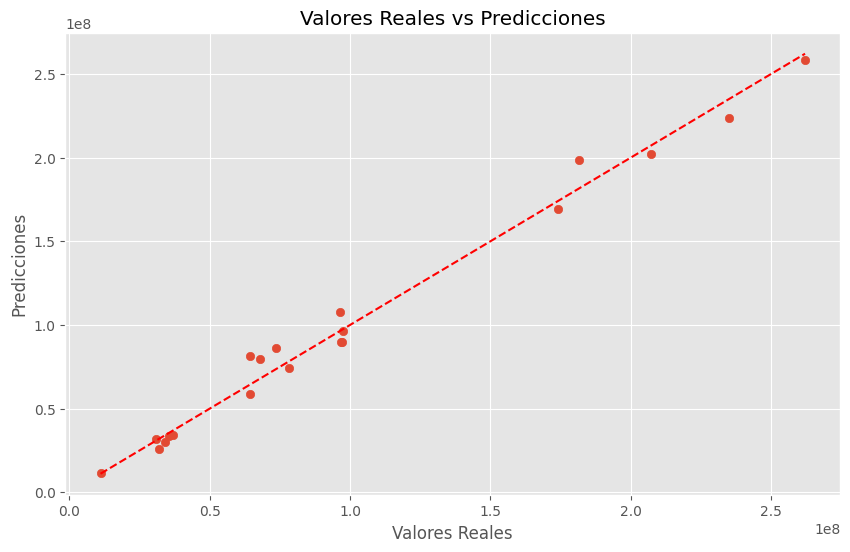

In [15]:
# Gráfico de valores reales vs predicciones

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()
